In [1]:
import pandas as pd
from pySankey.sankey import sankey

In [2]:
df = pd.read_csv("4-idiosyncratic-results.csv")
df

,batch,example,model,response_1,response_2
0,0,0,gpt-4,b,b
1,0,0,gpt-3.5-turbo,b,b
2,0,1,gpt-4,b,b
3,0,1,gpt-3.5-turbo,a,b
4,0,2,gpt-4,b,b
...,...,...,...,...,...
175,9,6,gpt-3.5-turbo,a,a
176,9,7,gpt-4,a,a
177,9,7,gpt-3.5-turbo,a,a
178,9,8,gpt-4,a,a


<Axes: title={'center': 'Selecting Option A'}, xlabel='Model', ylabel='Percentage'>

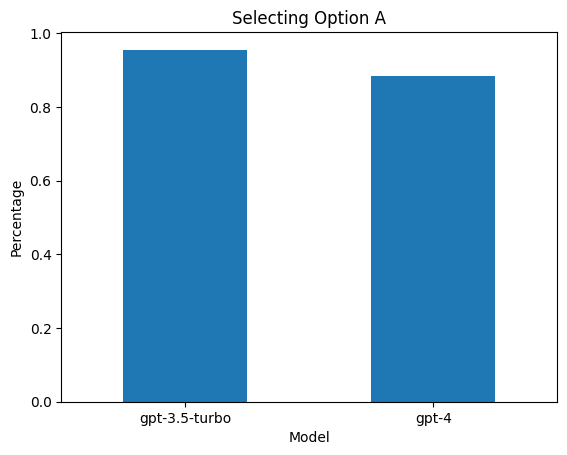

In [3]:
df_r1 = (
    df.groupby(["model", "response_1"])["example"]
    .count()
    .groupby("model")
    .apply(lambda x: x / x.sum())
    .droplevel(1)
    .reset_index()
    .rename({"example": "count"}, axis=1)
)

df_r1[df_r1["response_1"] == "a"].plot(
    kind="bar",
    x="model",
    y="count",
    legend=False,
    title="Selecting Option A",
    ylabel="Percentage",
    xlabel="Model",
    rot=0,
)

<Axes: title={'center': 'Selecting Option A by Batch'}, xlabel='Batch', ylabel='Percentage'>

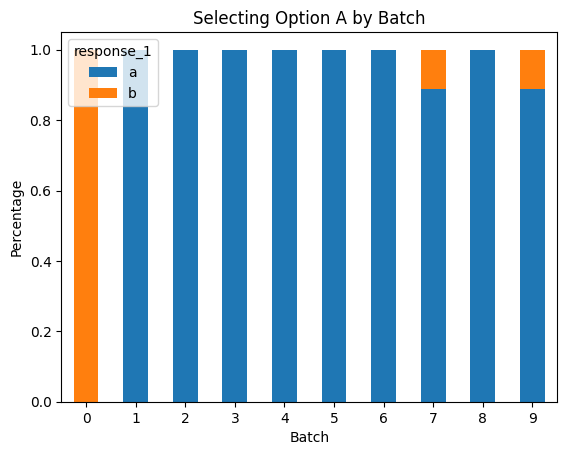

In [4]:
df_r1_batch = (
    df[df["model"].eq("gpt-4")]
    .groupby(["batch", "response_1"])
    .count()["example"]
    .groupby("batch")
    .apply(lambda x: x / x.sum())
    .unstack()
    .fillna(0)
    .droplevel(1)
)

df_r1_batch.plot(
    kind="bar",
    stacked=True,
    title="Selecting Option A by Batch",
    ylabel="Percentage",
    xlabel="Batch",
    rot=0,
)

In [5]:
intended = df["response_1"].eq("a") & df["response_2"].eq("b")
print(f"Intended: {intended.mean():.2%}. Naive: {1/4:.2%}. Sample: {intended.size}.")

Intended: 51.11%. Naive: 25.00%. Sample: 180.


In [6]:
filter = df["batch"] != 0
intended = df[filter]["response_1"].eq("a") & df[filter]["response_2"].eq("b")
print(f"Intended: {intended.mean():.2%}. Naive: {1/4:.2%}. Sample: {intended.size}.")

Intended: 53.09%. Naive: 25.00%. Sample: 162.


In [7]:
filter = df["response_1"].eq("a")
intended = df[filter]["response_1"].eq("a") & df[filter]["response_2"].eq("b")
print(f"Intended: {intended.mean():.2%}. Naive: {1/2:.2%}. Sample: {intended.size}.")

Intended: 56.79%. Naive: 50.00%. Sample: 162.


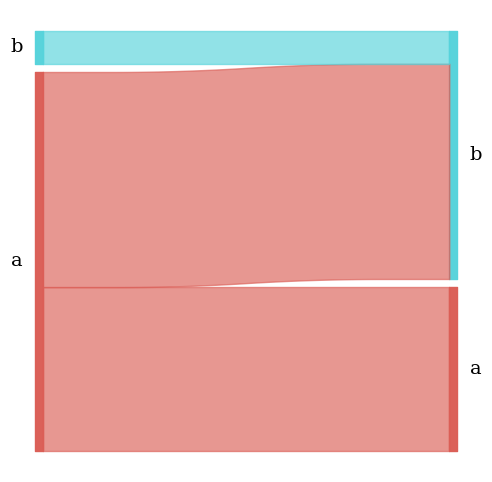

In [8]:
flows = df.groupby(["response_1", "response_2"]).size().reset_index(name="count")
sankey(flows["response_1"], flows["response_2"], flows["count"])

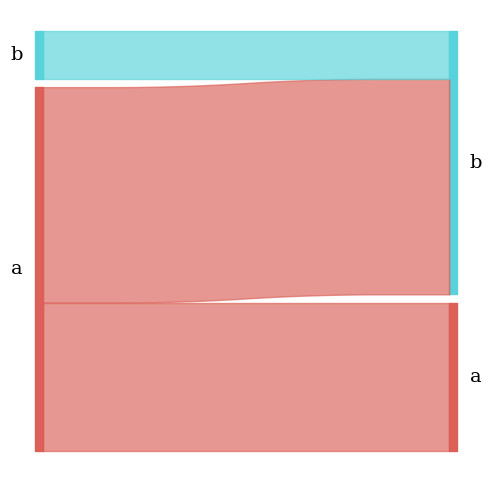

In [9]:
flows = df[df["model"].eq("gpt-4")].groupby(["response_1", "response_2"]).size().reset_index(name="count")
sankey(flows["response_1"], flows["response_2"], flows["count"])